In [1]:
import pandas as pd

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
movies = pd.read_csv('/content/u.data',sep='\t',names=column_names)
movies.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [2]:
movie_names = pd.read_csv('/content/Movie_Id_Titles')
movie_names.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
df = pd.merge(movies,movie_names,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [4]:
movies.shape

(100003, 4)

In [5]:
df.shape

(100003, 5)

In [6]:
df.groupby('title')['rating'].mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame()
ratings['rating'] =df.groupby('title')['rating'].mean()
ratings['count']=df.groupby('title')['rating'].count()
ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


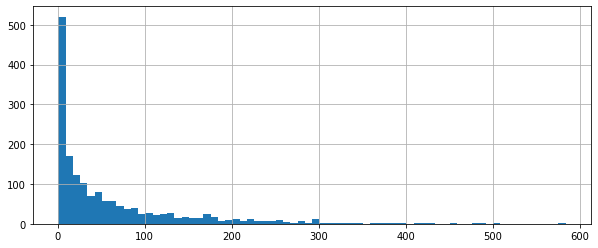

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
ratings['count'].hist(bins=70)

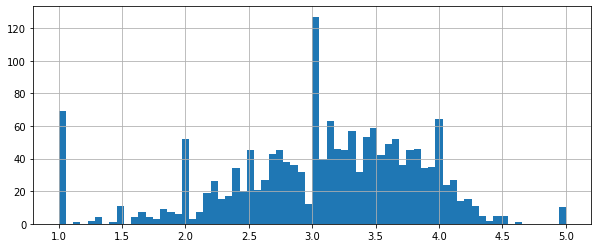

In [10]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

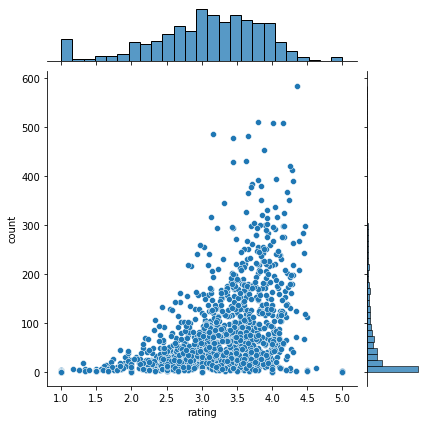

In [11]:
import seaborn as sns

sns.jointplot(x='rating',y='count',data=ratings)

In [12]:
movie_pt = pd.pivot_table(df,columns='title',index='user_id',values='rating').fillna(0)
movie_pt.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
leagues = movie_pt['20,000 Leagues Under the Sea (1954)']
leagues_correlat = movie_pt.corrwith(leagues)
leagues_correlat

title
'Til There Was You (1997)               -0.025532
1-900 (1994)                            -0.007695
101 Dalmatians (1996)                    0.128832
12 Angry Men (1957)                      0.230361
187 (1997)                              -0.010273
                                           ...   
Young Guns II (1990)                     0.058035
Young Poisoner's Handbook, The (1995)    0.071166
Zeus and Roxanne (1997)                 -0.002811
unknown                                  0.040462
Á köldum klaka (Cold Fever) (1994)      -0.009146
Length: 1664, dtype: float64

In [14]:
leagues_correlat.dropna(inplace=True)

In [15]:
leagues_similar = pd.DataFrame(leagues_correlat)
leagues_similar.head()

,0
title,
'Til There Was You (1997),-0.025532
1-900 (1994),-0.007695
101 Dalmatians (1996),0.128832
12 Angry Men (1957),0.230361
187 (1997),-0.010273


In [16]:
similarity_leagues = leagues_similar.sort_values(0,ascending=False)
similarity_leagues.head(25)

,0
title,
"20,000 Leagues Under the Sea (1954)",1.000000
Swiss Family Robinson (1960),0.495783
Around the World in 80 Days (1956),0.456324
Mary Poppins (1964),0.430068
Old Yeller (1957),0.411957
"Sound of Music, The (1965)",0.403608
Star Trek IV: The Voyage Home (1986),0.388337
Jurassic Park (1993),0.387187
2001: A Space Odyssey (1968),0.384624


In [17]:
count_similar = similarity_leagues.join(ratings['count'])
count_similar.head()

,0,count
title,,
"20,000 Leagues Under the Sea (1954)",1.000000,72
Swiss Family Robinson (1960),0.495783,39
Around the World in 80 Days (1956),0.456324,59
Mary Poppins (1964),0.430068,178
Old Yeller (1957),0.411957,64


In [18]:
count_similar[count_similar['count'] > 100].head(20)

,0,count
title,,
Mary Poppins (1964),0.430068,178
"Sound of Music, The (1965)",0.403608,222
Star Trek IV: The Voyage Home (1986),0.388337,199
Jurassic Park (1993),0.387187,261
2001: A Space Odyssey (1968),0.384624,259
True Lies (1994),0.383090,208
"Birds, The (1963)",0.382606,162
Ben-Hur (1959),0.375633,124
Mr. Smith Goes to Washington (1939),0.372366,105


In [19]:
def recommended(film_name,num_films=20,thresh=100):
  film = movie_pt[film_name]
  film_correlat = movie_pt.corrwith(film)
  film_correlat.dropna(inplace=True)
  film = pd.DataFrame(film_correlat)
  film.sort_values(0,ascending=False,inplace=True)
  film = film.join(ratings['count'])
  return film[film['count']>thresh].head(num_films)

In [20]:
recommended('101 Dalmatians (1996)')

,0,count
title,,
101 Dalmatians (1996),1.000000,109
Twister (1996),0.339981,293
Father of the Bride Part II (1995),0.329418,128
"Hunchback of Notre Dame, The (1996)",0.328220,127
Grumpier Old Men (1995),0.313787,148
Willy Wonka and the Chocolate Factory (1971),0.311255,326
Mrs. Doubtfire (1993),0.306384,192
"Lion King, The (1994)",0.303457,220
Independence Day (ID4) (1996),0.297238,429


KNN

In [21]:
movie_KNN = pd.pivot_table(df,columns='user_id',index='title',values='rating').fillna(0)
movie_KNN.head()

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
movie_KNN.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from scipy.sparse import csr_matrix
csr_matrix(movie_KNN.values)

<1664x944 sparse matrix of type '<class 'numpy.float64'>'
	with 99696 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.neighbors import NearestNeighbors
movie_features_df_matrix = csr_matrix(movie_KNN.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [25]:
distances , indicies = model_knn.kneighbors(movie_KNN.loc['101 Dalmatians (1996)',:].values.reshape(1,-1),n_neighbors=20)

In [26]:
movie_KNN.loc['101 Dalmatians (1996)',:].values.reshape(1,-1).shape

(1, 944)

In [27]:
distances.shape

(1, 20)

In [28]:
indicies[0]

array([   2,  764, 1547, 1633,  744, 1523,  505,  713,  867, 1013,  793,
        644,  987, 1005,  693,  435,   36,  770,  797, 1146])

In [29]:
indicies = indicies.flatten()
distances = distances.flatten()

for i in range(len(indicies)):
  if distances[i] == 0:
    print(f"the neighbours for {movie_KNN.index[indicies[i]]} : \n")
  else:
    print(f"{movie_KNN.index[indicies[i]]} distance is {distances[i]}")

the neighbours for 101 Dalmatians (1996) : 

Jack (1996) distance is 0.5521166148100434
Twister (1996) distance is 0.5581177989825218
Willy Wonka and the Chocolate Factory (1971) distance is 0.5767050608149951
Independence Day (ID4) (1996) distance is 0.579357611584622
Toy Story (1995) distance is 0.5906143711927523
Father of the Bride Part II (1995) distance is 0.5964760077534101
Hunchback of Notre Dame, The (1996) distance is 0.5966183483703249
Lion King, The (1994) distance is 0.596691403950603
Mrs. Doubtfire (1993) distance is 0.600032036022779
Jungle Book, The (1994) distance is 0.602400055297343
Grumpier Old Men (1995) distance is 0.6051731051552145
Mission: Impossible (1996) distance is 0.6087594711156644
Mr. Holland's Opus (1995) distance is 0.6090961708067393
Homeward Bound II: Lost in San Francisco (1996) distance is 0.6113403973562328
Dragonheart (1996) distance is 0.6219729820220938
Aladdin (1992) distance is 0.62386926215037
James and the Giant Peach (1996) distance is 0.6

In [30]:
recommended('101 Dalmatians (1996)',thresh=50)

,0,count
title,,
101 Dalmatians (1996),1.000000,109
Jack (1996),0.398777,70
Twister (1996),0.339981,293
"Jungle Book, The (1994)",0.336955,85
Father of the Bride Part II (1995),0.329418,128
"Hunchback of Notre Dame, The (1996)",0.328220,127
Grumpier Old Men (1995),0.313787,148
Willy Wonka and the Chocolate Factory (1971),0.311255,326
Mrs. Doubtfire (1993),0.306384,192
